# **Project Name - Turkiye Student Evaluation Analysis - Clustering**

# About the Dataset 

This data set contains a total 5820 evaluation scores provided by students from Gazi University in Ankara (Turkey). There is a total of 28 course specific questions and additional 5 attributes.

### Features:

instr: Instructor's identifier; values taken from {1,2,3} \
class: Course code (descriptor); values taken from {1-13} \
repeat: Number of times the student is taking this course; values taken from {0,1,2,3,...}\
attendance: Code of the level of attendance; values from {0, 1, 2, 3, 4}\
difficulty: Level of difficulty of the course as perceived by the student; values taken from {1,2,3,4,5}\
Q1: The semester course content, teaching method and evaluation system were provided at the start.\
Q2: The course aims and objectives were clearly stated at the beginning of the period.\
Q3: The course was worth the amount of credit assigned to it.\
Q4: The course was taught according to the syllabus announced on the first day of class.\
Q5: The class discussions, homework assignments, applications and studies were satisfactory.\
Q6: The textbook and other courses resources were sufficient and up to date.\
Q7: The course allowed field work, applications, laboratory, discussion and other studies.\
Q8: The quizzes, assignments, projects and exams contributed to helping the learning.\
Q9: I greatly enjoyed the class and was eager to actively participate during the lectures.\
Q10: My initial expectations about the course were met at the end of the period or year.\
Q11: The course was relevant and beneficial to my professional development.\
Q12: The course helped me look at life and the world with a new perspective.\
Q13: The Instructor's knowledge was relevant and up to date.\
Q14: The Instructor came prepared for classes.\
Q15: The Instructor taught in accordance with the announced lesson plan.\
Q16: The Instructor was committed to the course and was understandable.\
Q17: The Instructor arrived on time for classes.\
Q18: The Instructor has a smooth and easy to follow delivery/speech.\
Q19: The Instructor made effective use of class hours.\
Q20: The Instructor explained the course and was eager to be helpful to students.\
Q21: The Instructor demonstrated a positive approach to students.\
Q22: The Instructor was open and respectful of the views of students about the course.\
Q23: The Instructor encouraged participation in the course.\
Q24: The Instructor gave relevant homework assignments/projects, and helped/guided students.\
Q25: The Instructor responded to questions about the course inside and outside of the course.\
Q26: The Instructor's evaluation system (midterm and final questions, projects, assignments, etc.) effectively measured the course objectives.\
Q27: The Instructor provided solutions to exams and discussed them with students.\
Q28: The Instructor treated all students in a right and objective manner.

Q1-Q28 are all Likert-type, meaning that the values are taken from {1,2,3,4,5}

Dataset can be download from Kaggle website. The link is https://www.kaggle.com/datasets/onsrajhi/turkiye-student-evaluation-analysis-clustering

In [59]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from IPython.display import display


### **Load the data**

In [2]:
dt = pd.read_csv("turkiye-student-evaluation_generic.csv")

In [3]:
dt.head()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [4]:
dt.describe()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
count,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,...,5820.000000,5820.000000,5820.000000,5820.000000,5820.00000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000
mean,2.485567,7.276289,1.214089,1.675601,2.783505,2.929897,3.073883,3.178694,3.082474,3.105842,...,3.261684,3.285395,3.307388,3.317526,3.20189,3.166838,3.312543,3.222165,3.154811,3.308076
std,0.718473,3.688175,0.532376,1.474975,1.348987,1.341077,1.285251,1.253567,1.284594,1.278989,...,1.268442,1.276848,1.269974,1.268358,1.27259,1.275909,1.257286,1.270695,1.291872,1.278709
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,4.000000,1.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,3.000000,3.000000,3.000000,3.000000,2.00000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,3.000000,7.000000,1.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3.000000,10.000000,1.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000
max,3.000000,13.000000,3.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000


In [5]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5820 entries, 0 to 5819
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   instr       5820 non-null   int64
 1   class       5820 non-null   int64
 2   nb.repeat   5820 non-null   int64
 3   attendance  5820 non-null   int64
 4   difficulty  5820 non-null   int64
 5   Q1          5820 non-null   int64
 6   Q2          5820 non-null   int64
 7   Q3          5820 non-null   int64
 8   Q4          5820 non-null   int64
 9   Q5          5820 non-null   int64
 10  Q6          5820 non-null   int64
 11  Q7          5820 non-null   int64
 12  Q8          5820 non-null   int64
 13  Q9          5820 non-null   int64
 14  Q10         5820 non-null   int64
 15  Q11         5820 non-null   int64
 16  Q12         5820 non-null   int64
 17  Q13         5820 non-null   int64
 18  Q14         5820 non-null   int64
 19  Q15         5820 non-null   int64
 20  Q16         5820 non-null   in

In [6]:
dt.isnull().sum()

instr         0
class         0
nb.repeat     0
attendance    0
difficulty    0
Q1            0
Q2            0
Q3            0
Q4            0
Q5            0
Q6            0
Q7            0
Q8            0
Q9            0
Q10           0
Q11           0
Q12           0
Q13           0
Q14           0
Q15           0
Q16           0
Q17           0
Q18           0
Q19           0
Q20           0
Q21           0
Q22           0
Q23           0
Q24           0
Q25           0
Q26           0
Q27           0
Q28           0
dtype: int64

### **Exploratory Data Analysis (EDA)**

### Distribution of Categorical Variables

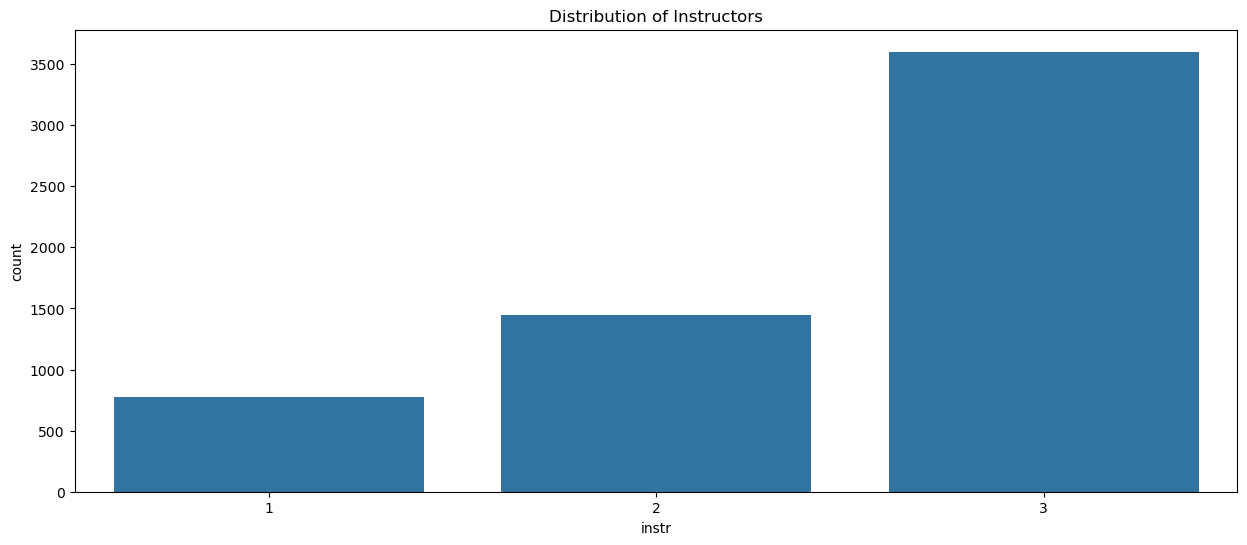

In [7]:
# Distribution of Categorical Variables
plt.figure(figsize=(15, 6))
sns.countplot(x = dt['instr'] ,  data = dt)
plt.title('Distribution of Instructors')
plt.show()

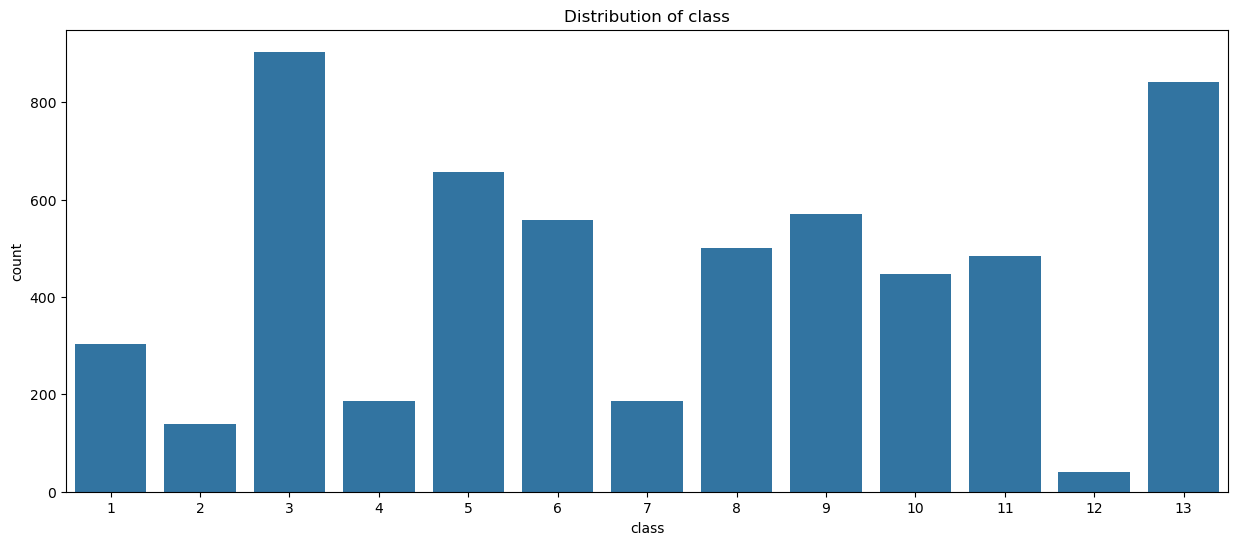

In [72]:

plt.figure(figsize=(15, 6))
sns.countplot(x = dt['class'] ,  data = dt)
plt.title('Distribution of class')
plt.show()

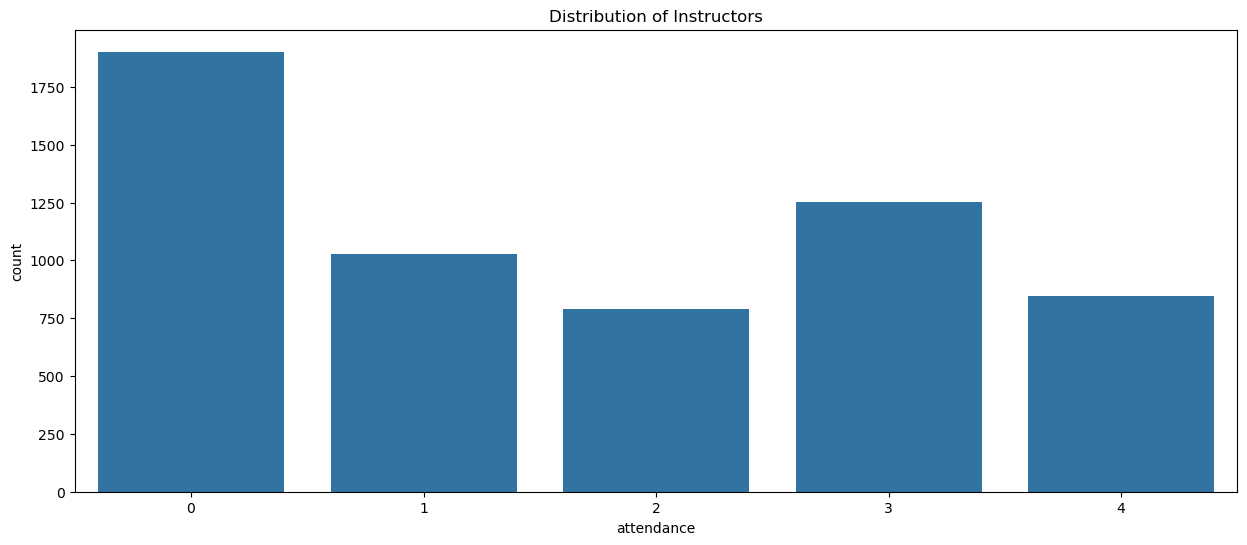

In [73]:

plt.figure(figsize=(15, 6))
sns.countplot(x = dt['attendance'] ,  data = dt)
plt.title('Distribution of Instructors')
plt.show()

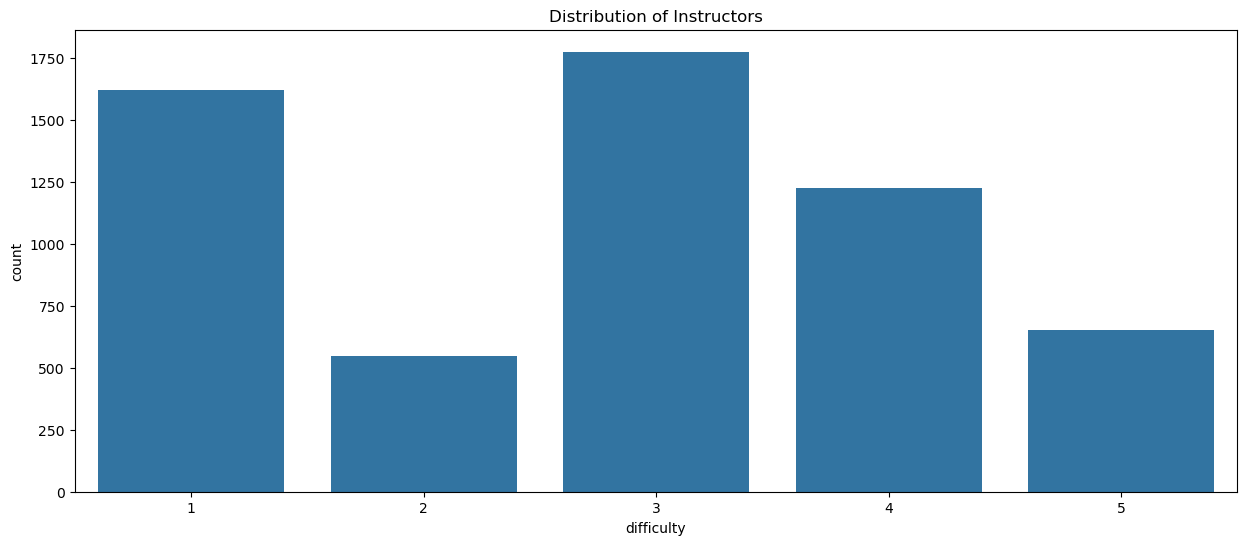

In [74]:
tion of Categorical Variables
plt.figure(figsize=(15, 6))
sns.countplot(x = dt['difficulty'] ,  data = dt)
plt.title('Distribution of Instructors')
plt.show()

### Correlation Analysis

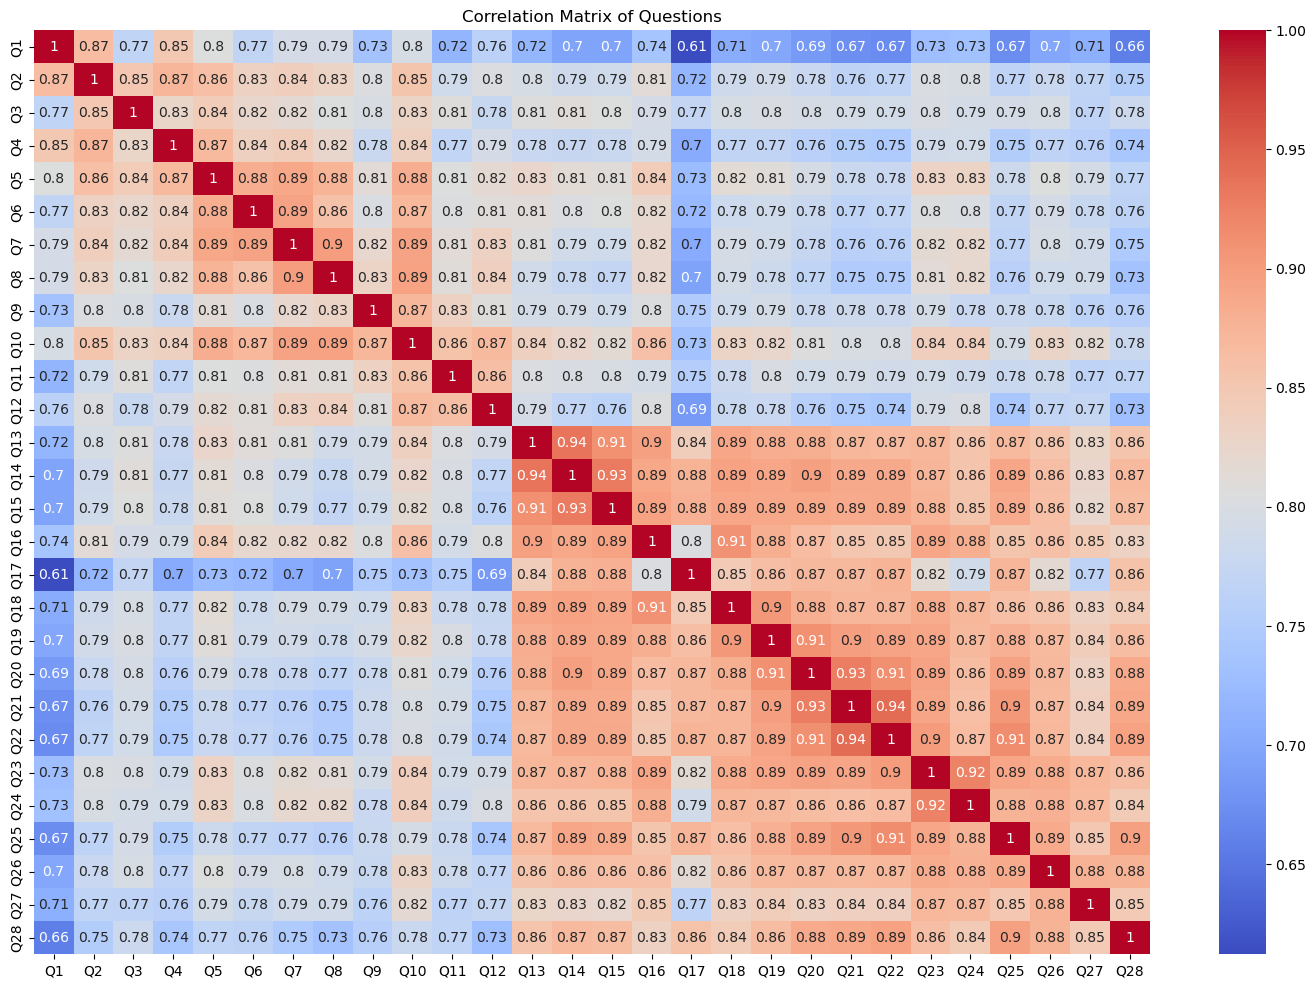

In [11]:

plt.figure(figsize=(18, 12))
sns.heatmap(dt.iloc[:, 5:].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Questions')
plt.show()

In [12]:
X = dt.drop(columns=['instr', 'class', 'nb.repeat', 'attendance', 'difficulty'])

In [13]:
X.columns

Index(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11',
       'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21',
       'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28'],
      dtype='object')

In [14]:
sc = StandardScaler()

In [15]:
x_SC = sc.fit_transform(X)

**so X variable we have 28 columns and we should reduce the dimentions that's why we will use Principal component analysis**

### Apply PCA for Dimensionality Reduction

In [16]:
pca = PCA(n_components = 2)
x_pca = pca.fit_transform(x_SC)

In [17]:
# Explained variance to understand how much variance is captured
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by PCA components: {explained_variance}")

Explained variance by PCA components: [0.82288939 0.04474705]


### Elbow Method for Optimal K 

In [18]:


wcss = []
K_range = range(1, 15)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_pca)
    wcss.append(kmeans.inertia_)

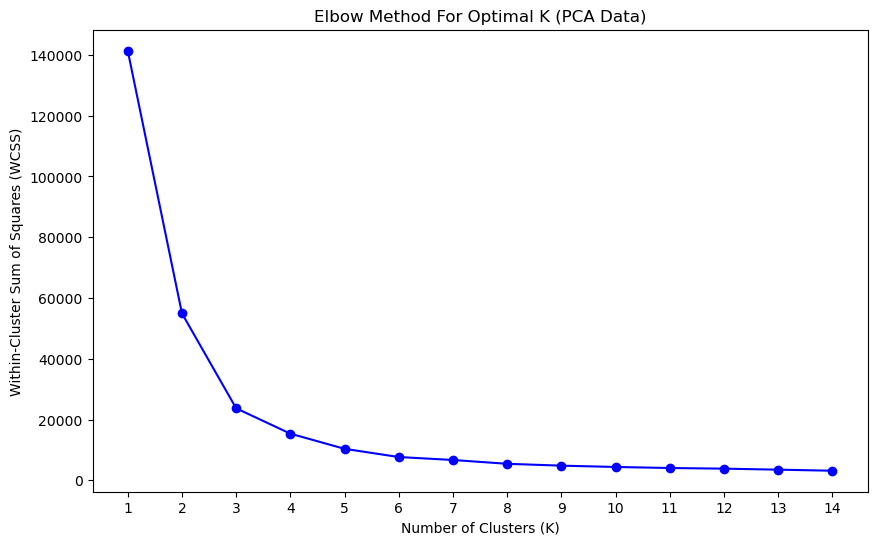

In [19]:
# Plotting the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(K_range, wcss, 'bo-')
plt.title('Elbow Method For Optimal K (PCA Data)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(K_range)
plt.show()

In [20]:
optimal_k = 3

## **1. K-Means Clustering**

In [75]:

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(x_pca)
silhouette_kmeans = silhouette_score(x_pca, kmeans_labels)
print(f'K-Means Silhouette Score with {optimal_k} clusters: {silhouette_kmeans}')

K-Means Silhouette Score with 3 clusters: 0.574080378060855


### Visualizing K-Means Clusters

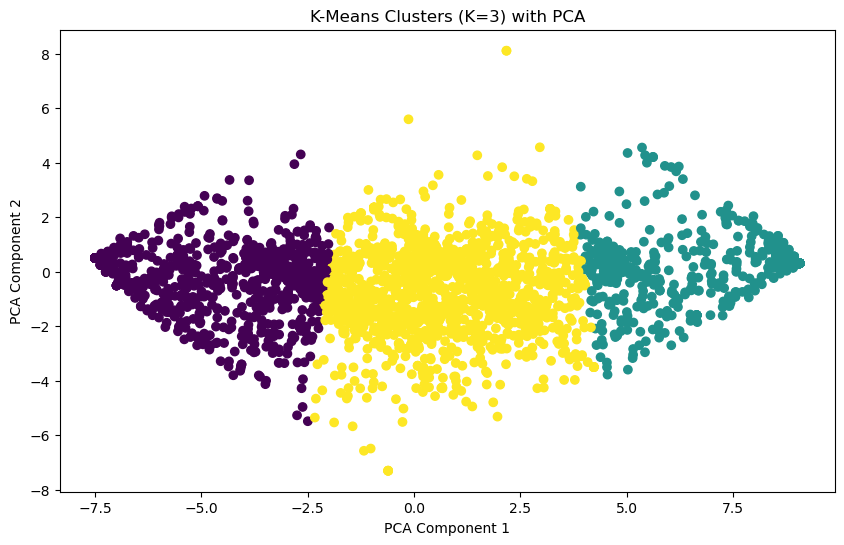

In [26]:
# Visualizing K-Means Clusters
plt.figure(figsize=(10, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=kmeans_labels, cmap='viridis', marker='o')
plt.title(f'K-Means Clusters (K={optimal_k}) with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

### **Visualizing Agglomerative Clustering Dendrogram**

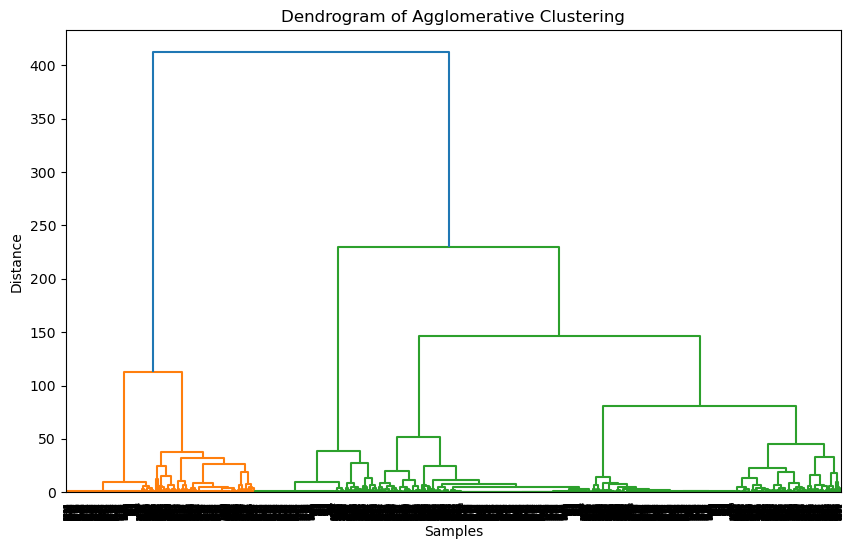

In [60]:
plt.figure(figsize=(10, 6))
Z = linkage(x_pca, 'ward')
dendrogram(Z)
plt.title('Dendrogram of Agglomerative Clustering')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

**so numbers of clusters here 2**

## **2. Agglomerative Hierarchical Clustering**

In [61]:
agg_cluster = AgglomerativeClustering(n_clusters=2)
agg_labels = agg_cluster.fit_predict(x_pca)
silhouette_agg = silhouette_score(x_pca, agg_labels)
print(f'Agglomerative Clustering Silhouette Score: {silhouette_agg}')


Agglomerative Clustering Silhouette Score: 0.5608549603760143


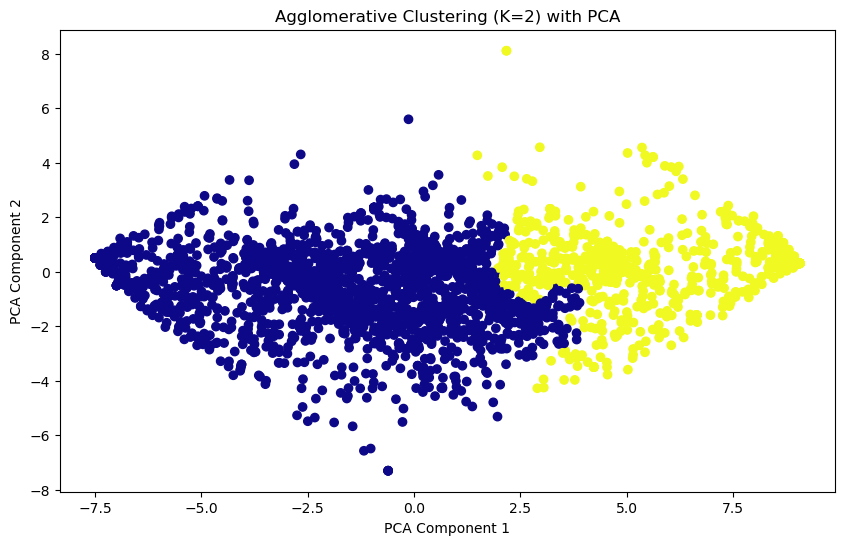

In [76]:
# Visualizing Agglomerative Clustering Clusters
plt.figure(figsize=(10, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=agg_labels, cmap='plasma', marker='o')
plt.title(f'Agglomerative Clustering (K={2}) with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

### **3. DBSCAN Clustering**

In [77]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(x_pca)
# Exclude noise (-1 label) when calculating silhouette score for DBSCAN
if len(set(dbscan_labels)) > 1:  # Ensure there are more than 1 cluster
    silhouette_dbscan = silhouette_score(x_pca[dbscan_labels != -1], dbscan_labels[dbscan_labels != -1])
    print(f'DBSCAN Silhouette Score: {silhouette_dbscan}')
else:
    silhouette_dbscan = "DBSCAN didn't form distinct clusters."
    print(silhouette_dbscan)

DBSCAN Silhouette Score: -0.08714974885925647


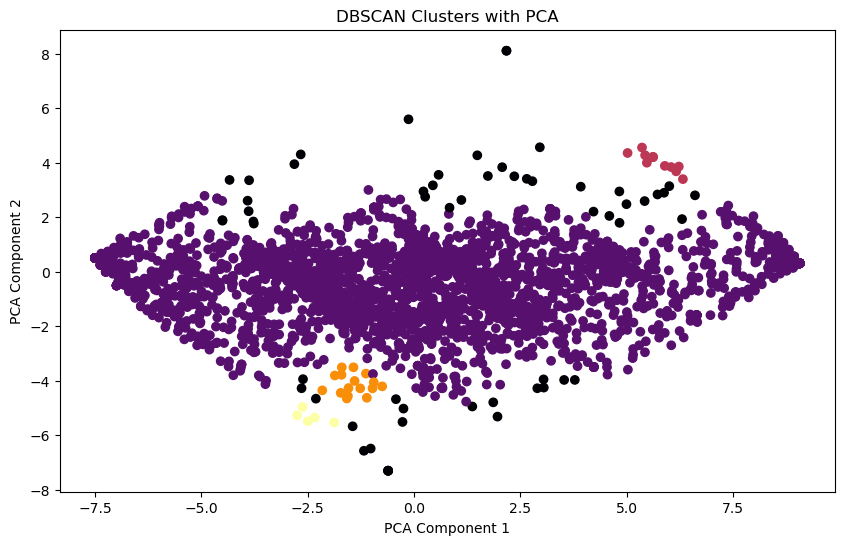

In [78]:
# Visualizing DBSCAN Clusters
plt.figure(figsize=(10, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=dbscan_labels, cmap='inferno', marker='o')
plt.title('DBSCAN Clusters with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

## **Interpretation - Cluster Profiles**

In [79]:
# Add cluster labels to the original data
dt['KMeans_Cluster'] = kmeans_labels
dt['Agglomerative_Cluster'] = agg_labels
dt['DBSCAN_Cluster'] = dbscan_labels

In [80]:
# Analyze clusters
kmeans_profile = dt.groupby('KMeans_Cluster').mean()
agg_profile = dt.groupby('Agglomerative_Cluster').mean()
dbscan_profile = dt.groupby('DBSCAN_Cluster').mean()

### Define a function to style DataFrames for better readability

In [81]:
def style_clusters(df):
    return df.style.background_gradient(cmap='coolwarm').format(precision=2)

In [82]:
# Display the cluster profiles
print("KMeans Cluster Profile")
display(style_clusters(kmeans_profile))


KMeans Cluster Profile


,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Agglomerative_Cluster,DBSCAN_Cluster
KMeans_Cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2.36,7.19,1.18,1.93,2.82,4.10,4.26,4.29,4.24,4.31,4.27,4.26,4.24,4.30,4.32,4.33,4.22,4.39,4.41,4.41,4.38,4.42,4.39,4.41,4.42,4.42,4.44,4.39,4.36,4.42,4.38,4.31,4.41,0.00,-0.00
1,2.58,7.55,1.25,1.22,2.52,1.40,1.40,1.51,1.44,1.39,1.41,1.40,1.38,1.50,1.37,1.47,1.38,1.41,1.44,1.46,1.35,1.61,1.39,1.42,1.41,1.45,1.47,1.38,1.38,1.49,1.42,1.40,1.48,1.00,0.00
2,2.55,7.21,1.23,1.67,2.89,2.63,2.82,3.00,2.84,2.86,2.89,2.81,2.78,2.96,2.83,2.99,2.78,3.11,3.20,3.18,2.98,3.37,3.08,3.14,3.19,3.22,3.22,3.03,2.97,3.22,3.07,2.98,3.22,0.08,0.00


In [83]:
print("Agglomerative Cluster Profile")
display(style_clusters(agg_profile))

Agglomerative Cluster Profile


,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,KMeans_Cluster,DBSCAN_Cluster
Agglomerative_Cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2.46,7.18,1.20,1.80,2.86,3.39,3.57,3.67,3.57,3.62,3.61,3.56,3.54,3.66,3.60,3.69,3.53,3.79,3.84,3.83,3.72,3.92,3.77,3.81,3.84,3.86,3.87,3.75,3.70,3.86,3.76,3.68,3.85,0.99,0.00
1,2.57,7.58,1.25,1.28,2.54,1.50,1.54,1.66,1.57,1.53,1.55,1.53,1.51,1.65,1.50,1.60,1.51,1.54,1.59,1.60,1.47,1.78,1.52,1.55,1.55,1.59,1.61,1.51,1.50,1.63,1.57,1.54,1.64,1.13,-0.01


In [84]:
print("DBSCAN Cluster Profile")
display(style_clusters(dbscan_profile))

DBSCAN Cluster Profile


,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,KMeans_Cluster,Agglomerative_Cluster
DBSCAN_Cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
-1,2.56,7.63,1.37,1.36,2.86,2.81,2.92,3.24,2.88,2.92,3.03,3.02,2.93,2.83,2.88,3.03,2.63,2.88,2.90,2.98,2.73,3.14,2.81,2.95,3.08,3.02,3.02,2.86,2.95,3.10,3.15,3.07,3.08,1.39,0.44
0,2.48,7.27,1.21,1.68,2.78,2.94,3.08,3.18,3.09,3.11,3.11,3.07,3.05,3.17,3.10,3.19,3.04,3.25,3.30,3.29,3.18,3.40,3.23,3.27,3.29,3.31,3.32,3.20,3.17,3.31,3.22,3.16,3.31,1.02,0.24
1,2.67,7.75,1.33,1.08,2.08,3.08,2.92,3.08,3.17,3.42,2.83,2.83,2.75,2.83,3.08,2.50,2.42,1.17,1.00,1.00,1.00,1.08,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
2,2.50,8.12,1.12,2.25,2.81,1.75,2.38,2.88,2.44,2.44,2.50,1.56,2.25,2.31,2.06,2.69,2.25,3.88,4.25,4.56,3.25,4.88,4.31,4.38,4.88,4.94,4.94,4.75,3.94,4.88,4.38,3.81,4.62,2.00,0.00
3,2.80,9.00,1.40,1.80,2.20,1.60,2.20,2.40,1.60,1.80,2.00,1.40,1.80,2.20,2.00,3.00,3.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,4.80,4.80,5.00,5.00,0.80,0.00
